# Session 1 notes

## Declaring variables

Variables are typed but not explicitly, when we store a value it change its type to the type of the value that I'm putting. This is comfortable but also dangerous!

In [ ]:
#Declare
variableName = value
#Fulfill
input(variableName)
#Output
print(variableName)


## Containers
### Set

In [ ]:
#Declare
mySet = set()
myOtherSet = {3,4}
#Add
mySet.add(3)
#Operations
print(mySet & myOtherSet)
print(mySet | myOtherSet)
print(mySet - myOtherSet)
print(3 in mySet)


### List

In [176]:
#Declare
myList = list()
myOtherList = [3,4]
#Append
myList.append(3)
#Operations
print(myList + myOtherList)
print(3 in myList)

### Dict

In [177]:
#Declare
myDict = dict()
myOtherDict = {3:"three",4:"four"}
#Add
myDict[3] ="number three"
#Operations
print(myDict.keys())
print(3 in myDict.keys())
print(myOtherDict[4])

## Control structures

### if

In [177]:
a = 0
input(a)
if a < 10:
    print("a is less than 10")
elif a == 10:
    print("a is 10")
else: 
    print("a is more than 10")


### for

In [179]:
myList = [3,4,"Leandro",3.4]
for element in range(len(myList)):
    print(myList[element])
    print(type(myList[element]))

## Input/Output of files

In [181]:
with open("data.txt", 'r') as infile:
    for line in infile:
        print(line)


10

14

15

20



## Fairness of a coin

Let's go with a very simple question: is my coin fair? By now we (pretend to) just know probabilities.

### Frequentist approach

In this approach, as we discussed, will focus on the data. Then, the only thing we can do is to flip a coin. I hope you remember that a binomial distribution reproduces this experiment (if not, Wikipedia can help you). Our experiments will flip the coin 10 times each.

In [75]:
# Numpy is a standard library for numerical operations on python
import numpy as np

n = 10 # number of trials
p = .5 #probability of each trial

# The variable s be an integer, result of a function that draw samples from a binomial distribution (gently included in numpy).
s = np.random.binomial(n, p) 
print(s)

1


In [76]:
# We can ask ten experiments and print how much tails we obtained on each
for i in range(10):
    s = np.random.binomial(n, p)
    print(s)


6
4
4
7
4
2
4
3
6
4


In [77]:
# We can pass a third parameter r to the function, that returns a list with the result of repeating the experiment r times
r = 10000
s = np.random.binomial(n, p, r) 
print(s)

[5 4 3 ... 3 8 4]


### A minimal taste on plotting

One of the simplest libraries to generate plots (simpler than the python native plot library) is seaborn. The "%" character is called "magic" and allows to comunicate with the kernel of the python notebooks. With %matplotlib inline we say that we want the plots in the very notebook and not in a separated window, which is the python standard way to show plots.

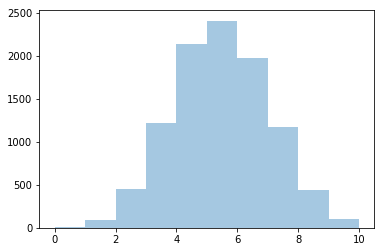

In [78]:
%matplotlib inline 
import seaborn as sns


# distplot plots the histogram of an array with data, in this case, the virtual observations
sns.distplot(s, bins=10, kde=False)

## Probabilities of the events of the sample space

We (pretend to) know just about probabilities. The first thing that we can compute is, for our experiments, if the coin is fair, the probability of each possible event.

To practice how to program in python we will do it really from the scratch. If we are flipping the coin 10 times, all the possible outcomes are the permutations of two possible values (heads and tails) in a list of ten elements, allowing repetitions is just $2^{10}$. 




In [2]:
allPossibleOutComes = [[]] # I have the initial state, an experiment with no flips yet

# Each time I flip the coin
for flip in range(10):
    # To all the existing already computed outputs
    allPossibleOutComesCopy = allPossibleOutComes.copy()
    allPossibleOutComes = []
    for intermediateOutcome in allPossibleOutComesCopy:
        for outcome in ["H","T"]:
            allPossibleOutComes.append(intermediateOutcome + [outcome])
            
print("All possible outcomes length:", len(allPossibleOutComes))

        

All possible outcomes length: 1024


### A minimal taste on functions and comprehension lists

A function, like in mathematics, takes some inputs and return some output.
List by comprehension provide a concise way to create lists. It consists of brackets containing an expression followed by a for clause, then
zero or more for or if clauses. The expressions can be anything, meaning you can
put in all kinds of objects in lists.

In [13]:
# The functions are defined by the word def
def numberOfHeads(event):
    headsCount=0
    for coinResult in event:
        if coinResult == "H":
            headsCount += 1
    return headsCount

# The comprehension lists are constructed with for statements inside brackets
outcomesWithFiveHeads = [outcome for outcome in allPossibleOutComes if numberOfHeads(outcome) == 5]

print("Number of outcomes with 5 heads", len(outcomesWithFiveHeads) )


Number of outcomes with 5 heads 252


### A minimal taste on lambda functions

One (good) thing on python is that a variable, apart of be able to store a value, can store a function as well. Lambda functions are inline defined functions that return the evaluation of the expression that is written in them

In [12]:
outcomesWithNHeads = lambda n : [outcome for outcome in allPossibleOutComes if numberOfHeads(outcome) == n]

for i in range(11):
    print("Number of outcomes with", i, "heads", len(outcomesWithNHeads(i)))

Number of outcomes with 0 heads 1
Number of outcomes with 1 heads 10
Number of outcomes with 2 heads 45
Number of outcomes with 3 heads 120
Number of outcomes with 4 heads 210
Number of outcomes with 5 heads 252
Number of outcomes with 6 heads 210
Number of outcomes with 7 heads 120
Number of outcomes with 8 heads 45
Number of outcomes with 9 heads 10
Number of outcomes with 10 heads 1


## Estimators

Ok, but i have my coin with me and I flip it 100 times and I get 60 heads. What can I say of my coin?

As we said before, frequentists look for $Pr(data \mid hypotesis)$ rely only on the data. Then, can we compute $Pr(heads=60 \mid Pr(heads)=0.5)$.

We are getting the probability for the null hypothesis $Pr(heads)=0.5$ to obtain exactly 60 heads. Is this probability telling us what we want to know? 

We need something to measure how far my observation is from what I expect to see if the null hypotesis is correct: a test statistic. Low value of the test statistic, more likely not to reject the null hypotesis, high value of the test statistic, more likely to reject the null hypotesis.

Finally, we need a formal way to determine if the test statistic is “low” or “high” and actually make a decision.

#### One sample statistical test

$$ T = \frac{Z}{s} = \frac{\overline{x} - \mu_0}{ \sqrt{\sigma^2 / n}} $$

$\overline{X}$ is the average of the observations

$\sigma$ is the (estimated) standard deviation. Remember: $$\sigma = \sqrt{ \frac { \sum_{i=1}^{n} (x-\overline{x})^2 } {n} }$$

$n$ is the number of observations

$\mu_0$ is the given value




In [165]:
from math import sqrt

heads = 40 # We will assign heads as obtaining a 0
tails = 60 # And tails will be 1
flips = heads+tails
mu_0 = (heads*0+tails*1) / flips
null_h = 0.5 # Aka, the coin is fair

sqared_standard_deviation = ( tails * ( 1- mu_0 )**2 + heads * ( 0- mu_0 )**2 ) / flips
T = ( mu_0 - null_h) / sqrt( sqared_standard_deviation / flips)

In [167]:
print ("sqared sigma", sqared_standard_deviation)
print ("T",T)

sqared sigma 0.24
T 2.0412414523193148


### p-value

As we said, he p-value is the probability of observing a sample mean that is as or more extreme than the observed. We can construct a function that computes the normal distribution, or just use it from a library. 

In [185]:
import scipy.stats

n = scipy.stats.norm()

print ("The p-value of our sample is", n.pdf(x=T))


The p-value of our sample is 0.04967408718089753


### Doing the same but using python scipy

We populate a list with our results and just run a t-test for 1 sample. We will continue with this next week (specially coming back to what p-value is and what is not)

In [184]:
# All "basic" statistic computations we can found them in scipy. 
import scipy.stats

# Let say that we obtain 40 tails and 60 heads.
a = [0] * 40
a += [1] * 60

# Then is as easy as calling a function that compute the tests and print what it returns.
print (scipy.stats.ttest_1samp(a, 0.5))

Ttest_1sampResult(statistic=2.0310096011589893, pvalue=0.044934725212630505)
